<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/05%20Neurals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf # PyTorch 
print(tf.__version__)

1.15.0


In [0]:
# TENSORFLOW IS NOT AN EASY THING TO USE-> an API was built on top of it
# this API is called KERAS -> it makes it easy to build neural networks
# Keras is just a collection of classes, functions and datasets to hasten the NN design process
# Define all hyperparameters together
#What are hyperparameters -> everything that impacts my model but is not provided by the user input
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = keras.datasets.fashion_mnist
(trainx, trainy),(testx,testy) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Python -> don't need to write C++ 
# KERAS -> no need to write tensorflow 
# KERAS -> tensorflow (MOST USED), theanos (OLD), NLTK (Natural Language Toolkit) 
# TENSORFLOW IS THE ACTUAL WORKED-> think of keras as just a function call on top of TF

trainy[0] # each list is representing a row on image 
# BW -> on a scale of 1 BYTE -> 255 -> all colors are represented between 0 to 255
# COLOR-> 3 channels (RGB) each with 1 byte representation-> (R,G,B) -> (255,0,130)

9

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(len(trainx)) # training
print(len(testx)) # testing

60000
10000


In [8]:
trainx.shape

(60000, 28, 28)

Ankle boot


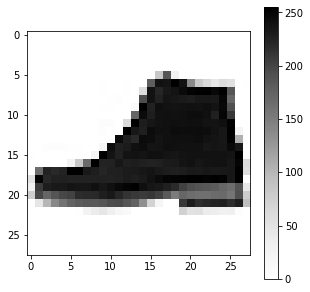

In [15]:
print(class_names[trainy[42]]) # output name
plt.figure(figsize=(5,5))
plt.imshow(trainx[42], cmap='Greys') # the actual image 
plt.colorbar()
plt.show()
# WHEN i had numerical data -> df.head, df.desribe -> IMSHOW 
# EXPLORATORY DATA ANALYSIS

In [0]:
# FEature engineering for data
# NO MISSING PIXELS! 
# No null pixels either -> else image would have not loaded
# NORMALIZATION
# FOR PROFIT/LOSS problems or where negative numbers make sense -> Z-Score
# When with COLORS -> 0, 255 -> 0,1 -> /255
trainx_normalized = trainx/255
testx_normalized = testx/255


Ankle boot


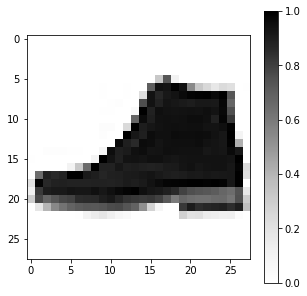

In [18]:
print(class_names[trainy[42]]) # output name
plt.figure(figsize=(5,5))
plt.imshow(trainx_normalized[42], cmap='Greys') # the actual image 
plt.colorbar()
plt.show()
# COLORS -> the preferred scale is 0 to 1
# 0,1 was diff 1,inf was diff -1,0 was diff from -inf to -1 
# SOLID or LIGHT 
# ALL light colors combined become white (R,G,B,A)-> Red, Green, Blue, Transparency # SCATTERING and COMBINATIVE MODELS
# ALL solid colors combined become black (C,M,Y,K)-> Cyan, Magenta, Yellow, Black # SUBTRACTIVE and ADDITIVE MODELS 
# Image Processing 
# GRAYSCALE are neither solid nor light 

In [0]:
# Design the model
HP_epochs = 20
HP_dense1 = 128 # tweak this number to tune your network, maybe 128?256?16?
model = keras.Sequential() # Sequential neural network -> layers one after the other in a sequence
# no parallel layers, one layer will wait for the previous layer to execute
# THIS IS CALLED A DIRECTED ACYCLIC GRAPH
model.add(keras.layers.Flatten(input_shape=(28,28))) # takes 28X28 and converts to 784X1
model.add(keras.layers.Dense(HP_dense1, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))




In [56]:
model.summary()
#Weights = input_size X output_lines + bias 
#784 X 128 = 100352
#BIAS 128 biases
#100352 + 128 = 100480

# weights = 128X10 + 10 = 1280 + 10 = 1290
# SOFTMAX converts answers into PROBABILITY DISTRIBUTION
# this means sum of all the answers will be = 1
# 2 outputs -> SOFTMAX
# 3,2 -> SOFTMAX -> [0.66,0.34]


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# COMPILE THE MODEL -> LR -> how is it going to be optimized? loss-> function to calculate how much mistake made
# metrics-> how to measure this loss? is it increasing or decreasing? is it good or bad? 
# Darts -> BOARD 
# 100 shots
# HITS: 75     Misses: 25
# Metric-> Mean Squared Error to reduce distance between my hit and actual bull's eye-> closer to the target
# Loss Function-> FUNCTION/method-> MSE from Circle to the dart point 
# loss uses a METRIC to calculate the mistake 
# LR-> ADAPTIVE LEARNING-> if i am away from answer, incr the LR, if close to ans, decr the LR
# LR-> ADAM optimizer is name of Adaptive Learning in tensorflow
# CATEGORICAL DATA -> ENTROPY -> only two categories-> BINARY_CROSSENTROPY
# multiple categories -> SPARSE_CATEGORICAL_CROSSENTROPY
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])# regrsn->['mse','mae']


In [58]:
# TRAIN YOUR MODEL
# TRAINING DATA, TRAINING RESULT -> 2 X 2 = 4
# TEST DATA, ask it predictions -> 3X 2 = ? -> model -> 42 -> NO!-> 6
# EPOCHS-> TIMELINES. No. of times to look at your entire data again and again

history = model.fit(trainx,trainy, epochs=HP_epochs)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/sample - loss: 2.9927 - acc: 0.6847
Epoch 2/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.6408 - acc: 0.7750
Epoch 3/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5886 - acc: 0.7907
Epoch 4/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5514 - acc: 0.8033
Epoch 5/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5437 - acc: 0.8112
Epoch 6/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5307 - acc: 0.8165
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5218 - acc: 0.8182
Epoch 8/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5098 - acc: 0.8218
Epoch 9/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5074 - acc: 0.8252
Epoch 10/20
60000/60000 [==============================] - 

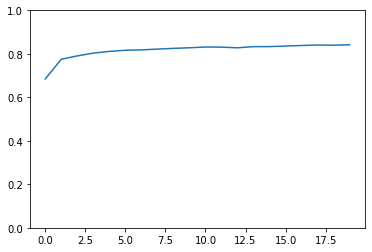

In [59]:
acc_y = history.history['acc']
loss_y = history.history['loss']
plt.figure()
plt.plot(range(20), acc_y )
plt.ylim(0,1)
#plt.plot(range(20),loss_y)
plt.show()

In [60]:
test_loss, test_acc = model.evaluate(testx, testy)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.5709 - acc: 0.8211


In [0]:
predictions = model.predict(testx)

In [71]:
for i in range(len(testx)):
  if(np.argmax(predictions[i]) != testy[i]):
    print('Mistake: Actual Class = '+ class_names[testy[i]]+ " v/s Prediction = "+class_names[np.argmax(predictions[i])])


Mistake: Actual Class = Coat v/s Prediction = Pullover
Mistake: Actual Class = Coat v/s Prediction = Pullover
Mistake: Actual Class = Pullover v/s Prediction = T-shirt/top
Mistake: Actual Class = Ankle boot v/s Prediction = Sandal
Mistake: Actual Class = Coat v/s Prediction = Pullover
Mistake: Actual Class = Shirt v/s Prediction = Pullover
Mistake: Actual Class = T-shirt/top v/s Prediction = Dress
Mistake: Actual Class = Dress v/s Prediction = Pullover
Mistake: Actual Class = Shirt v/s Prediction = T-shirt/top
Mistake: Actual Class = Dress v/s Prediction = Shirt
Mistake: Actual Class = Pullover v/s Prediction = Shirt
Mistake: Actual Class = Coat v/s Prediction = Pullover
Mistake: Actual Class = Coat v/s Prediction = Pullover
Mistake: Actual Class = Bag v/s Prediction = Shirt
Mistake: Actual Class = Coat v/s Prediction = Pullover
Mistake: Actual Class = Pullover v/s Prediction = Shirt
Mistake: Actual Class = Dress v/s Prediction = Coat
Mistake: Actual Class = Ankle boot v/s Prediction =